# CNN Recognizer project results
This notebook collates the results of the project against different test sets and comparison with a benchmark model. 

Dataset creation, cleaning, test splits, and model training are described in a different notebook called project-description which can be found in the model development walkthrough.

### Results based on a balanced test set of 1600 examples. 

![title](../../reports/figures/results/osfl-optimal-threshold-precision-recall-accuracy.png)

### Some notes on binary classifer evaluation


![title](../../reports/figures/results/binary-classifiers.png)

### Chosen metrics: Accuracy, Precision, Recall, and F1 score
__Accuracy__ is often sought as a metric for binary classifier evaluation, but it is only meaningful in cases where the test set contains equal numbers of positive and negative cases. __Precision__ and __Recall__ still work well in cases where the test set is imbalanced. The __F1 score__ gives a way of combining precision and recall into a single metric - taking the harmonic mean of the two.


- Accuracy = (TP + TN) / (TP + TN + FP + FN)
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)
- F1 = 2 * (Precision * Recall) / (Precision + Recall)

__Precision__ asks the question: "Out of all the positive predictions, how many were correct?" 

__Recall__ asks the question: "Out of all the actual positives, how many did we predict correctly?"

__Accuracy__ is the proportion of true results (both true positives and true negatives) among the total number of examples examined. 

# Performance metrics of OSFL model on balanced validation set
_OSFL model Precision, Recall, Accuracy and F1 Score for OSFL model on balanced validation set with 400 samples per class. The second figure is the confusion matrix at a classification threshold of 0.5_.

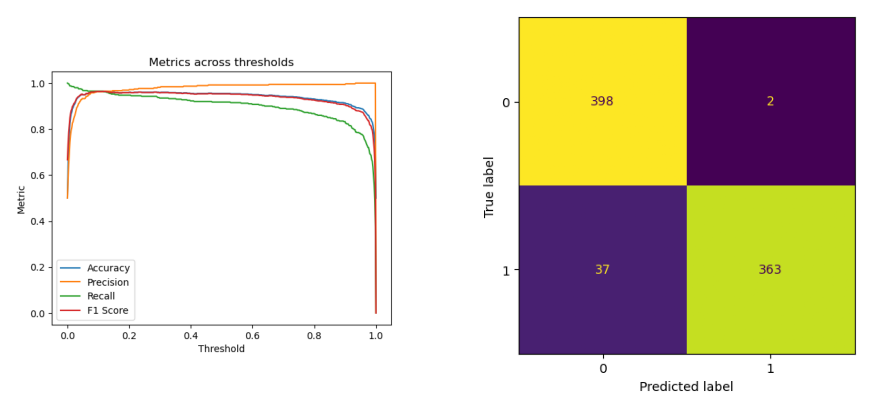

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from IPython.display import Video

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8

# read images
img_A = mpimg.imread('../../reports/figures/results/osfl-pr-curves-balanced-validation-set.png')
img_B = mpimg.imread('../../reports/figures/results/osfl-cm-balanced-validation-set.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].axis('off')
ax[1].axis('off')
ax[0].imshow(img_A)
ax[1].imshow(img_B)
plt.show()

# Performance metrics of OSFL model on balanced withheld test set
To prevent overfitting to the validation set, a set of examples was set to one side at the beginning of the project and not looked at until this final evaluation stage. These examples were taken from different locations to those used in the training set to avoid contaminating the test data with examples the model had already seen during training. Because the human labelled data was known to contain mis-lablels, I checked each example in the test set and re-labelled any incorrect ones. 

To guard against possible bias introduced through my own verification of the labels, the model was also evaluated using a second test set which had only the original human labelling. Whilst this second test set contained errors, it did allow me to compare model performance against a benchmark model in a more objective way. 

# Withheld test set results:

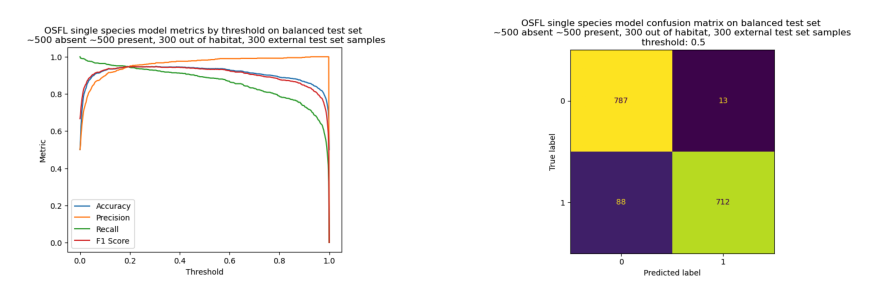

In [2]:

# read images
img_A = mpimg.imread('../../reports/figures/results/pr-curves-balanced-test-set.png')
img_B = mpimg.imread('../../reports/figures/results/osfl-cm-balanced-test.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].axis('off')
ax[1].axis('off')
ax[0].imshow(img_A)
ax[1].imshow(img_B)
plt.show()

_OSFL model Precision, Recall, F1 score, Accuracy on a balanced withheld test set with 800 samples per class, and from a mixture of sources. Second figure is the confusion matrix at a threshold of 0.5. Video shows how the confusion matrix changes as the threshold is adjusted._

# Model evaluation against unbalanced validation set
Most of the samples in the absent class are unverified, meaning some of the absent labels will actually be present, but only a small number of them since the top-down-cleaning was done on the dataset. This plot shows how the precision recall curves are likely to change when the model is run on an unbalanced dataset where the target species vocalization accounts for 6% of the total audio. 

The main difference is that at __inference time, the classification threshold should be set higher__ than it appeared when the model was evaluated against a balanced test set - at around 0.8.

The accuracy curve in this plot is not meaningful because the classes are unbalanced.

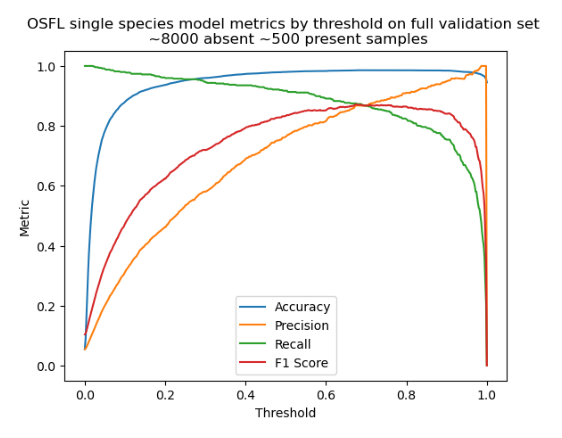

In [3]:
# read image
img_A = mpimg.imread('../../reports/figures/results/osfl-pr-curves-unbalanced-unverified-validation-set.png')
# set image size
plt.figure(figsize=(7,10))
plt.axis('off')
plt.imshow(img_A)
plt.show()

# OSFL model trained entirely on focal examples
As an experiment, a model was trained on only focal examples extracted by a model. If a new model was trained only on these focal examples, then the new model had high precision but low recall. Here are the results of that test. Note that the recall curve looks lower than it actually is, since the y axis starts at 0.5. 

This test was done against a balanced validation set, so the accuracy metric is meaningful.

![focal only](../../reports/figures/results/osfl-pr-curves-focal-only.png)



# Model comparison with benchmark model

To test whether the model performed better than an existing model, I chose to evaluate against HawkEars, which is an excellent multi-species recognizer capable of detecting 328 bird species found in Canada. I chose this model because of its focus on Canada's birds, which is broadly the same region as the OSFL model.

Since HawkEars is a multi species model, it produces an output activation for each of the 328 species it is trained on. The loss function used to train HawkEars is Binary Cross Entropy Loss, meaning that each of the output activations is independently put through its own sigmoid function, and not scaled based on the sum of all the other output activations as would be the case if Cross Entropy Loss was used. Because of this feature of the output activations, I decided it was acceptable to evaluate the model by looking at the Olive Sided Flycatcher output activation alone, and to ignore the other species' predictions. 

It should be remembered that this usage of the HawkEars model is different to the normal production usage - where the output would occur alongside 327 other species predictions. 



To collect the hawkears model predictions, the following process was used:

1. Export the examples in the test set as individual 3s audio clips
2. Run the HawkEars model on each clip, with the threshold setting set to zero, so that the output activation for each species is given. 
3. Filter out any predictions for other species, and keep only the target species predictions.
4. Combine the predictions into a pandas dataframe, and re-combine the predictions with the original test set labels.
5. Evaluate the model using the same metrics as the OSFL model.

## Results of OSFL model against the Hawkears OSFL output node
At threshold which gave hawkears the highest F1 score measured against a balanced test set containting 1600 examples, the following metrics were obtained:

![hawkears optimal threshold](../../reports/figures/results/hawkears-.png)


# Withheld test set results

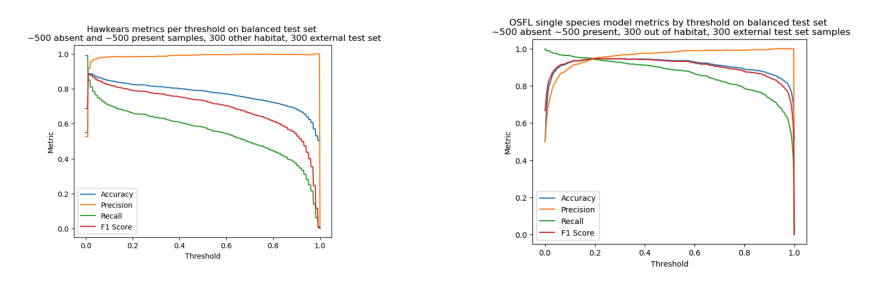

In [4]:
# read images
img_A = mpimg.imread('../../reports/figures/results/hawkears-test-set-preds.png')
img_B = mpimg.imread('../../reports/figures/results/pr-curves-balanced-test-set.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].axis('off')
ax[1].axis('off')
ax[0].imshow(img_A)
ax[1].imshow(img_B)
plt.show()

### PR Curves measured against an uncleaned balanced test set
This was done to guard against unintentional bias introduced during the cleaning process.

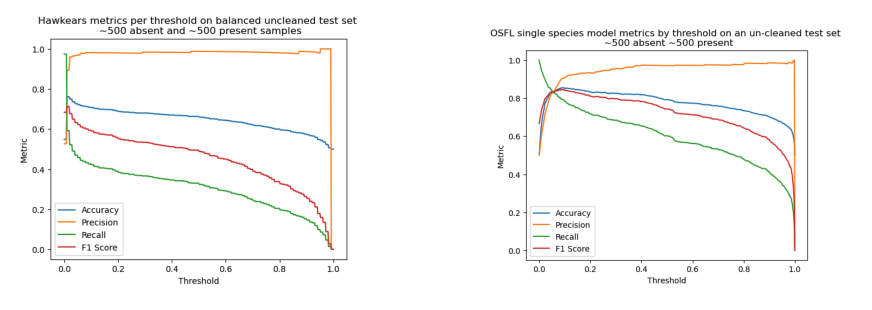

In [5]:

# read images
img_A = mpimg.imread('../../reports/figures/results/hawkears-pr-curves-uncleaned-test-set.png')
img_B = mpimg.imread('../../reports/figures/results/pr-curves-uncleaned-test-set.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].axis('off')
ax[1].axis('off')
ax[0].imshow(img_A)
ax[1].imshow(img_B)

plt.show()

### Confusion matrices for the models each at their optimal threshold

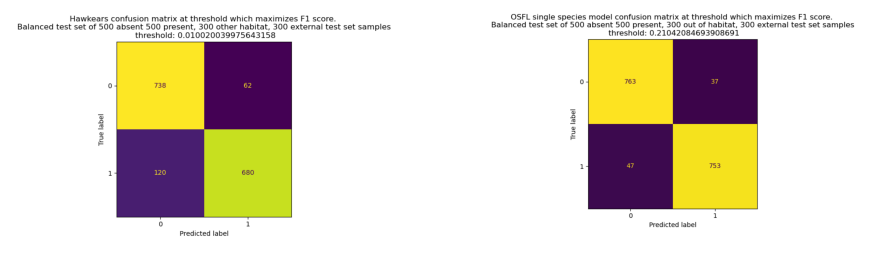

In [6]:

# read images
img_A = mpimg.imread('../../reports/figures/results/hawkears-cm-optimal-threshold.png')
img_B = mpimg.imread('../../reports/figures/results/cm-optimal-threshold-balanced-test-set.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].axis('off')
ax[1].axis('off')
ax[0].imshow(img_A)
ax[1].imshow(img_B)
plt.show()

## Effect of changing the threshold on the confusion matrix

### OSFL CNN Recognizer
https://drive.google.com/file/d/1XaIQEqc4p0zthzxvma_nO4tW2iKYt08m/view?usp=sharing

<iframe src="https://drive.google.com/file/d/1XaIQEqc4p0zthzxvma_nO4tW2iKYt08m/preview" width="640" height="480" allow="autoplay"></iframe>

### HawkEars OSFL output node
https://drive.google.com/file/d/1TsSgGDKBxeoTWhiRSQUj1R807Y3-V9zG/view?usp=sharing

<iframe src="https://drive.google.com/file/d/1TsSgGDKBxeoTWhiRSQUj1R807Y3-V9zG/preview" width="640" height="480" allow="autoplay"></iframe>